<a href="https://colab.research.google.com/github/CandudeProg/Dataset1Vicente/blob/main/ProyectoDII_Candela_Vicente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROYECTO: PREDICCIÓN DE ABANDONO (CHURN) IBM**

---
# 📂 Contexto del Dataset

Este dataset es provisto por IBM y representa información realista de una empresa de telecomunicaciones ficticia que ofrece servicios como telefonía, internet y televisión.

Contiene datos de **más de 7000 clientes** y tiene información sobre:

- Datos personales (género, si tienen dependientes, si tienen pareja).
- Servicios contratados (internet, líneas múltiples, servicios en la nube, etc.).
- Detalles del contrato (tipo de contrato, forma de pago, facturación electrónica).
- Información financiera (cargos mensuales, cargos totales).
- Variable objetivo: `Churn`, que indica si el cliente **se dio de baja o no**.

---

## Caso de estudio: Telco Customer Churn

### Objetivo del Proyecto
Este proyecto busca anticipar el abandono de clientes en una empresa de telecomunicaciones, utilizando datos reales proporcionados por IBM. Se analizan factores clave como tipo de contrato, servicios contratados y cargos mensuales, aplicando técnicas de análisis exploratorio y modelos predictivos. El fin es detectar patrones de churn para facilitar decisiones comerciales más informadas.

### Hipótesis
El abandono de clientes está relacionado con su tipo de contrato, antigüedad (tenure), cargos mensuales y servicios contratados.

### Fases del análisis
1. Adquisición de datos  
2. Limpieza y transformación  
3. Análisis exploratorio  
4. Modelado y evaluación  
5. Conclusiones y recomendaciones para el negocio


## Presentación Web del Proyecto



---



## 🛠️ Herramientas Utilizadas
Hice todo el proyecto en el ambiente de Google Colab, usando lenguaje Python. Para manejar los datos trabajé con pandas y numpy. Las visualizaciones las realicé con seaborn, matplotlib y también con plotly cuando se requería algo más interactivo. Para entrenar el modelo usé scikit-learn, y como el dataset estaba desbalanceado, apliqué SMOTE desde imblearn.
También usé algunas herramientas útiles como ipywidgets para facilitar pruebas, y warnings para evitar mensajes molestos durante la ejecución.

## ✈ Carga de Datos

In [ ]:
# 1. Acá importo todas las librerías necesarias para explorar y visualizar los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# 2. Subo el archivo desde mi computadora (funciona en Google Colab)
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn (1).csv to WA_Fn-UseC_-Telco-Customer-Churn (1) (1).csv


In [ ]:
# 3. Leo el archivo subido como un DataFrame y lo almaceno en una variable llamada df
import io

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Paleta personalizada estilo "Mode 20"
mode20_palette = ['#A8D5BA', '#5DA2A6', '#A7C6ED', '#FFD166', '#FB8B8B',
                  '#E0BBE4', '#FFAAA5', '#FF8C42', '#FFBCBC', '#B29189']
sns.set_palette(mode20_palette)

## 📐 Estructura general del Dataset

In [ ]:
# 4. Reviso cuántos registros y variables tiene el dataset, y cómo vienen distribuidas
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print("\nColumnas:", df.columns.tolist())
display(df.head())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("Duplicados:", df.duplicated().sum())


Número de filas: 7043
Número de columnas: 21

Columnas: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Tipos de datos:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Valores nulos por columna:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0

## 🧹 Limpieza y Transformación de los Datos (Data Wrangling)

In [ ]:
# 5. Estándarizo todos los nombres de columnas para que no tengan espacios ni mayúsculas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
# 6. Convierto la columna totalcharges a numérico porque venía como texto
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# Elimino las filas que no tienen totalcharges
df = df[df['totalcharges'].notna()].reset_index(drop=True)


In [ ]:
# 7. Unifico los valores de "No internet service" o "No phone service" en todas las columnas relevantes
servicios = ['multiplelines', 'onlinesecurity', 'onlinebackup',
             'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for col in servicios:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [ ]:
# 8. Creo una variable nueva que representa el ingreso total acumulado del cliente
df['ingreso_total_estimado'] = df['tenure'] * df['monthlycharges']


## ❌ Outliers y Eliminaciones

In [ ]:
# 9. Acá reviso los valores nulos columna por columna y su porcentaje
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de nulos por columna:")
print(round((df.isnull().sum() / df.shape[0]) * 100, 2))


Cantidad de valores nulos por columna:
customerid                0
gender                    0
seniorcitizen             0
partner                   0
dependents                0
tenure                    0
phoneservice              0
multiplelines             0
internetservice           0
onlinesecurity            0
onlinebackup              0
deviceprotection          0
techsupport               0
streamingtv               0
streamingmovies           0
contract                  0
paperlessbilling          0
paymentmethod             0
monthlycharges            0
totalcharges              0
churn                     0
ingreso_total_estimado    0
dtype: int64

Porcentaje de nulos por columna:
customerid                0.0
gender                    0.0
seniorcitizen             0.0
partner                   0.0
dependents                0.0
tenure                    0.0
phoneservice              0.0
multiplelines             0.0
internetservice           0.0
onlinesecurity            0.

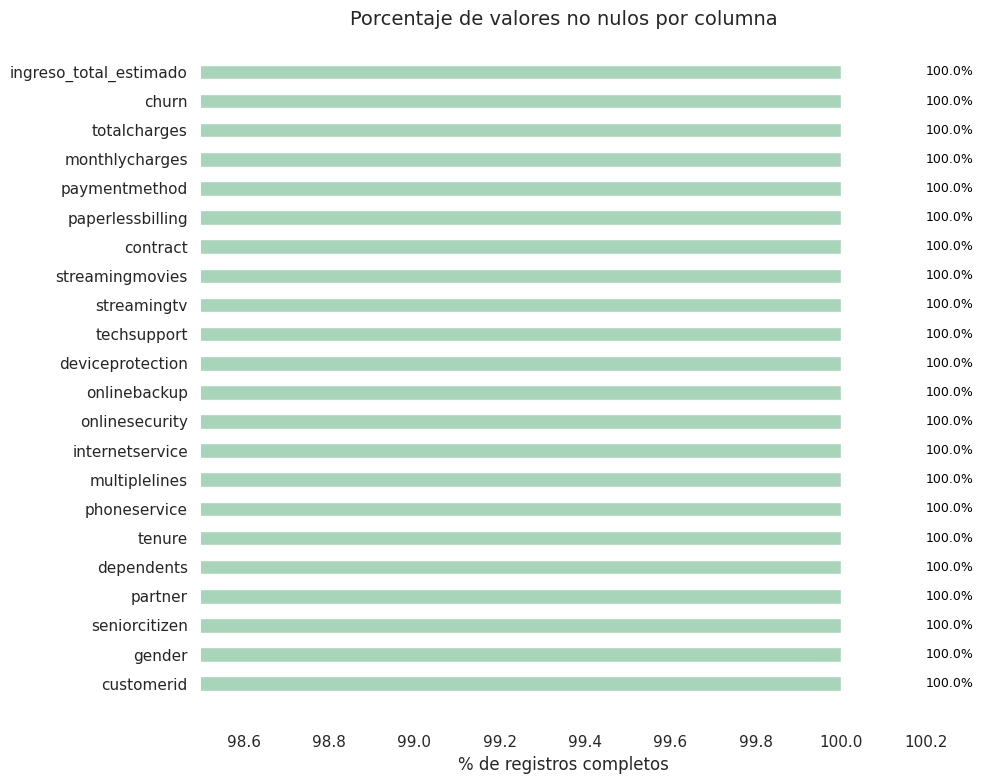

In [ ]:
# 10. Visualizo el % de valores no nulos por columna con un gráfico horizontal
color_no_null = '#A8D5BA'

# Calculo el % de valores no nulos
percent_non_nulls = (1 - df.isnull().sum() / df.shape[0]) * 100
percent_non_nulls = percent_non_nulls.sort_values()

# Gráfico
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(percent_non_nulls.index, percent_non_nulls.values, height=0.5, color=color_no_null)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.2, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', va='center', fontsize=9, color='black')

ax.set_title("Porcentaje de valores no nulos por columna", fontsize=14)
ax.set_xlabel("% de registros completos")
ax.set_xlim(98.5, 100.2)
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()


In [ ]:
# 11. Antes de eliminar los registros, inspecciono cuáles tienen totalcharges nulo (si aún no los filtré)
if 'totalcharges' in df.columns and df['totalcharges'].isna().sum() > 0:
    print("\nRegistros con totalcharges nulo:")
    columnas = [col for col in ['customerid', 'tenure', 'monthlycharges', 'totalcharges'] if col in df.columns]
    display(df[df['totalcharges'].isna()][columnas])
    print("\nTodos esos registros tienen tenure =", df[df['totalcharges'].isna()]['tenure'].unique())
else:
    print("✅ Ya no hay registros con totalcharges nulo para inspeccionar.")


✅ Ya no hay registros con totalcharges nulo para inspeccionar.


## 🔢 Valores únicos por columna

In [ ]:
# 13. Primero veo cuántos valores únicos tiene cada columna
print("\nCantidad de valores únicos por columna:\n")
valores_unicos = df.nunique().sort_values(ascending=False)
for col, cant in valores_unicos.items():
    print(f"{col}: {cant}")




Cantidad de valores únicos por columna:

customerid: 7032
totalcharges: 6530
ingreso_total_estimado: 6050
monthlycharges: 1584
tenure: 72
paymentmethod: 4
internetservice: 3
contract: 3
seniorcitizen: 2
gender: 2
dependents: 2
partner: 2
multiplelines: 2
phoneservice: 2
streamingtv: 2
techsupport: 2
deviceprotection: 2
onlinebackup: 2
onlinesecurity: 2
streamingmovies: 2
paperlessbilling: 2
churn: 2


In [ ]:
# 14. Ahora inspecciono los valores únicos reales en columnas categóricas
print("\nValores únicos por columna categórica:\n")
for col in df.select_dtypes(include='object').columns:
    print(f"{col} ({df[col].nunique()}): {df[col].unique()}")



Valores únicos por columna categórica:

customerid (7032): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender (2): ['Female' 'Male']
partner (2): ['Yes' 'No']
dependents (2): ['No' 'Yes']
phoneservice (2): ['No' 'Yes']
multiplelines (2): ['No' 'Yes']
internetservice (3): ['DSL' 'Fiber optic' 'No']
onlinesecurity (2): ['No' 'Yes']
onlinebackup (2): ['Yes' 'No']
deviceprotection (2): ['No' 'Yes']
techsupport (2): ['No' 'Yes']
streamingtv (2): ['No' 'Yes']
streamingmovies (2): ['No' 'Yes']
contract (3): ['Month-to-month' 'One year' 'Two year']
paperlessbilling (2): ['Yes' 'No']
paymentmethod (4): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn (2): ['No' 'Yes']


## ✅ Guardado del Dataset Limpio y Transformado

In [ ]:
# 15. Aplico One-Hot Encoding sin eliminar clases para conservar bien los valores de churn

# Copio el df limpio antes del encoding
df_encoded = df.copy()

# Reviso la distribución original de churn (Yes/No)
if df_encoded['churn'].nunique() == 2:
    print("Distribución original de churn:")
    print(df_encoded['churn'].value_counts())

# Aplico codificación a variables categóricas
df_encoded = pd.get_dummies(df_encoded, drop_first=False)

# Confirmo que se creó correctamente la columna dummy de churn
churn_cols = [col for col in df_encoded.columns if 'churn' in col.lower()]
print("Columnas dummy relacionadas con churn:", churn_cols)

# Confirmo que tenure sigue estando disponible
print("¿tenure en df_encoded?", 'tenure' in df_encoded.columns)



Distribución original de churn:
churn
No     5163
Yes    1869
Name: count, dtype: int64
Columnas dummy relacionadas con churn: ['churn_No', 'churn_Yes']
¿tenure en df_encoded? True


In [ ]:
# 16. Creo columna interpretativa de churn asegurando que tenga Yes y No explícitamente
if 'churn_Yes' in df_encoded.columns:
    df_encoded['Churn_text'] = np.where(df_encoded['churn_Yes'] == 1, 'Yes', 'No')
elif 'churn_yes' in df_encoded.columns:
    df_encoded['Churn_text'] = np.where(df_encoded['churn_yes'] == 1, 'Yes', 'No')
else:
    churn_dummy = [col for col in df_encoded.columns if col.lower() == 'churn_yes']
    if churn_dummy:
        df_encoded['Churn_text'] = np.where(df_encoded[churn_dummy[0]] == 1, 'Yes', 'No')
    else:
        print("❌ No se encontró columna dummy de churn.")



In [ ]:
# 🔍 Validaciones finales:
if 'tenure_bin' not in df_encoded.columns:
    df_encoded['tenure_bin'] = pd.cut(df_encoded['tenure'],
                                      bins=[0, 3, 12, 24, 48, 72],
                                      labels=['≤3', '4-12', '13-24', '25-48', '49-72'],
                                      include_lowest=True)

print("¿tenure presente?:", 'tenure' in df_encoded.columns)
print("\nChurn_text:\n", df_encoded['Churn_text'].value_counts(dropna=False))
print("\ntenure_bin:\n", df_encoded['tenure_bin'].value_counts(dropna=False))



¿tenure presente?: True

Churn_text:
 Churn_text
No     5163
Yes    1869
Name: count, dtype: int64

tenure_bin:
 tenure_bin
49-72    2239
25-48    1594
4-12     1124
≤3       1051
13-24    1024
Name: count, dtype: int64


In [ ]:
# 17. Guardo el dataset final codificado para usarlo en modelado y visualizaciones
df_encoded.to_csv('df_telco_limpio.csv', index=False)
print("✅ Dataset guardado como 'df_telco_limpio.csv'")


✅ Dataset guardado como 'df_telco_limpio.csv'


## 🔍 Exploratory Data Analysis (EDA)


En esta sección analizo en profundidad la estructura del dataset y sus relaciones internas.  
Divido el análisis en tres niveles: univariado, bivariado y multivariado, con foco en la variable objetivo `churn`.



## 🎯 Variable Objetivo: Churn

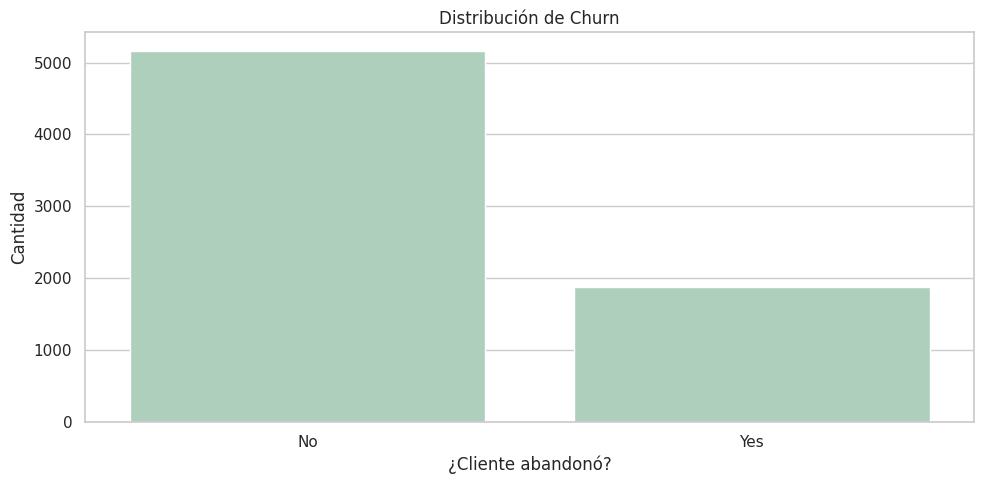


📌 **Interpretación:**
La variable objetivo `churn` está desbalanceada: la mayoría de los clientes permanecen.
Esto es clave a la hora de elegir las métricas del modelo (por ejemplo, no usar solo accuracy).


In [ ]:
# 19. Visualizo cómo se distribuye la variable objetivo
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

mode20_palette = ['#A8D5BA', '#5DA2A6']
sns.set_palette(mode20_palette)

sns.countplot(data=df, x='churn')
plt.title('Distribución de Churn')
plt.xlabel('¿Cliente abandonó?')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

Markdown("""
📌 **Interpretación:**
La variable objetivo `churn` está desbalanceada: la mayoría de los clientes permanecen.
Esto es clave a la hora de elegir las métricas del modelo (por ejemplo, no usar solo accuracy).
""")



## 📦 Análisis Univariado

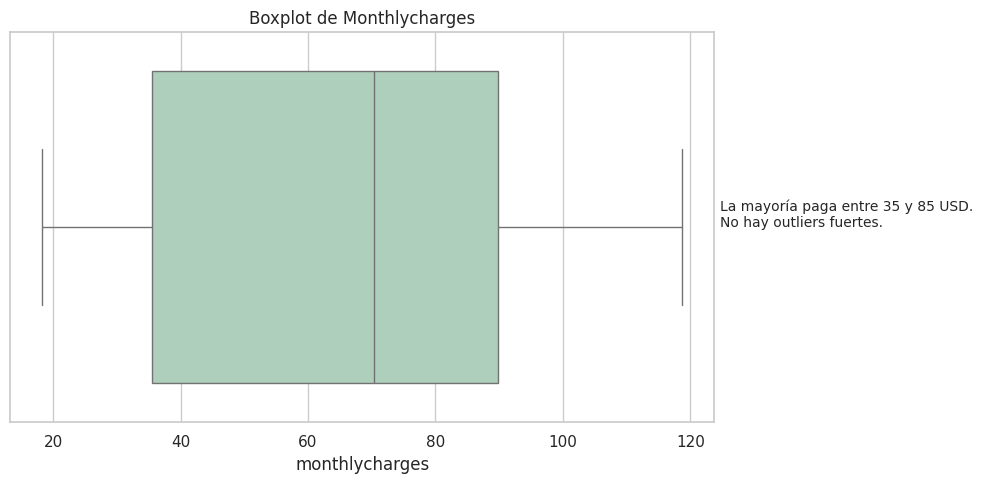

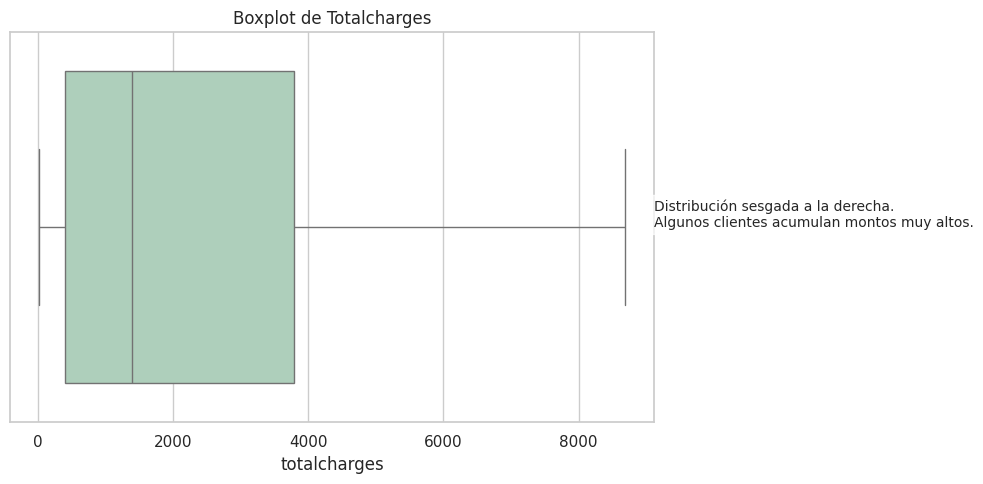

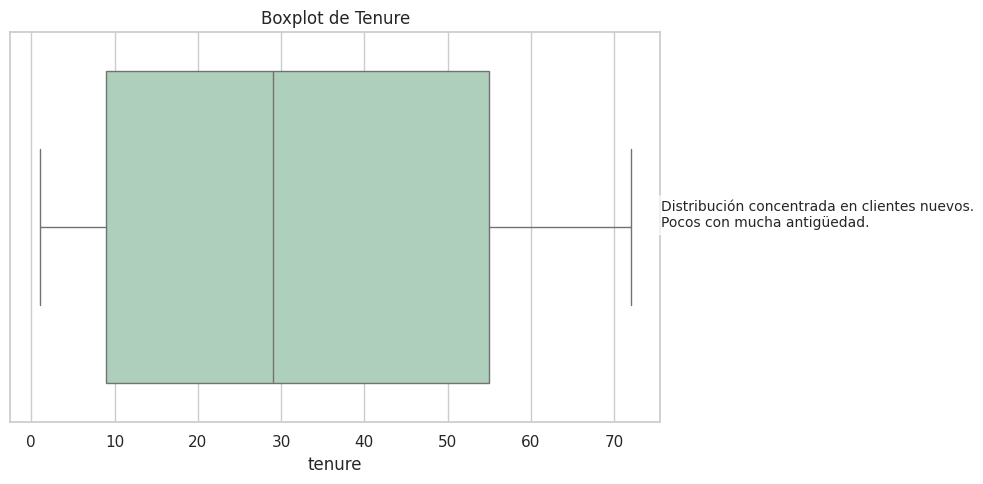

In [ ]:
# 20. Boxplots con comentarios visuales embebidos
comentarios = {
    'monthlycharges': 'La mayoría paga entre 35 y 85 USD.\nNo hay outliers fuertes.',
    'totalcharges': 'Distribución sesgada a la derecha.\nAlgunos clientes acumulan montos muy altos.',
    'tenure': 'Distribución concentrada en clientes nuevos.\nPocos con mucha antigüedad.'
}

for col in ['monthlycharges', 'totalcharges', 'tenure']:
    sns.boxplot(x=df[col], color='#A8D5BA')
    plt.title(f'Boxplot de {col.capitalize()}')
    plt.xlabel(col)

    x_max = df[col].max()
    x_offset = x_max + (x_max * 0.05)
    plt.text(x_offset, 0, comentarios[col], fontsize=10,
             bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))
    plt.tight_layout()
    plt.show()


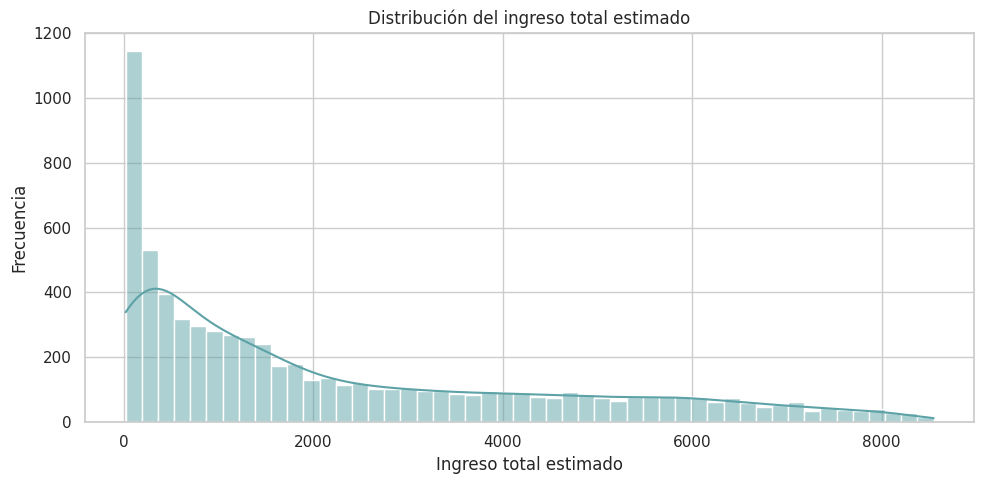


📌 **Interpretación:**
La mayoría de los clientes generaron ingresos acumulados bajos.
Esto sugiere que muchos abandonan antes de aportar valor significativo.
Este indicador ayuda a priorizar retención por valor potencial del cliente.


In [ ]:
# 21. Distribución del ingreso acumulado estimado con KDE

# Aseguro importaciones necesarias
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

# Paleta definida en el proyecto
mode20_palette = ['#A8D5BA', '#5DA2A6']
sns.set_palette(mode20_palette)

# Gráfico
sns.histplot(data=df, x='ingreso_total_estimado', kde=True, bins=50, color='#5DA2A6')
plt.title('Distribución del ingreso total estimado')
plt.xlabel('Ingreso total estimado')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Interpretación integrada
Markdown("""
📌 **Interpretación:**
La mayoría de los clientes generaron ingresos acumulados bajos.
Esto sugiere que muchos abandonan antes de aportar valor significativo.
Este indicador ayuda a priorizar retención por valor potencial del cliente.
""")


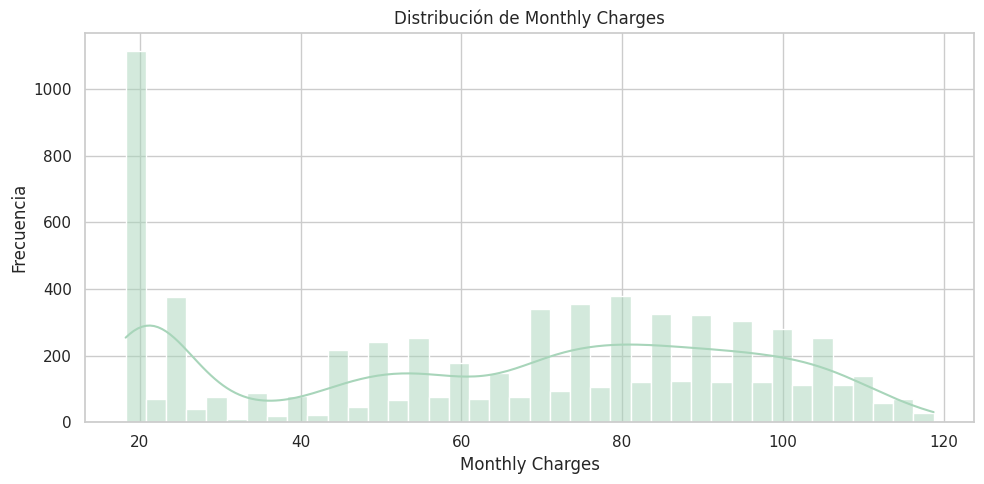


📌 **Interpretación:**
`monthlycharges` muestra una distribución bimodal.
Sugiere distintos niveles de servicio o planes, lo cual puede tener relación con churn.


In [ ]:
# 22. Distribución de Monthly Charges
sns.histplot(data=df, x='monthlycharges', kde=True, bins=40, color=mode20_palette[0])
plt.title('Distribución de Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Markdown("""
📌 **Interpretación:**
`monthlycharges` muestra una distribución bimodal.
Sugiere distintos niveles de servicio o planes, lo cual puede tener relación con churn.
""")


## 🎯 Análisis Bivariado

In [ ]:
# 24. Churn según tipo de contrato
import plotly.express as px

fig = px.histogram(df,
                   x='contract',
                   color='churn',
                   barmode='group',
                   text_auto=True,
                   color_discrete_sequence=mode20_palette,
                   title='Churn según tipo de contrato')
fig.update_layout(xaxis_title='Tipo de contrato', yaxis_title='Cantidad de clientes', legend_title='Churn')
fig.show()

Markdown("""
📌 **Interpretación:**
Clientes con contrato mensual tienen tasas de churn significativamente más altas.
Contratos más largos (1 o 2 años) retienen mejor. Es una variable clave para modelos y decisiones comerciales.
""")


📌 **Interpretación:**
Clientes con contrato mensual tienen tasas de churn significativamente más altas.
Contratos más largos (1 o 2 años) retienen mejor. Es una variable clave para modelos y decisiones comerciales.


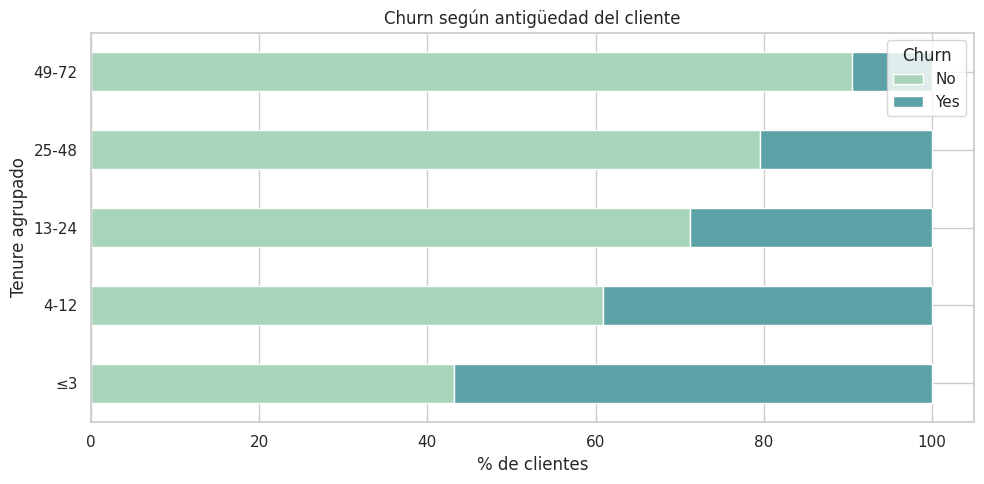


📌 **Interpretación:**
El churn es muy alto entre los nuevos clientes (≤3 meses), y disminuye fuertemente a medida que crece la antigüedad.
Esto evidencia que la permanencia reduce el riesgo de abandono.


In [ ]:
# 25. Churn por antigüedad agrupada (tenure_bin)
import matplotlib.pyplot as plt
import pandas as pd

tabla_tenure = pd.crosstab(df_encoded['tenure_bin'], df['churn'], normalize='index') * 100
tabla_tenure.plot(kind='barh', stacked=True, color=mode20_palette)
plt.title('Churn según antigüedad del cliente')
plt.xlabel('% de clientes')
plt.ylabel('Tenure agrupado')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Markdown("""
📌 **Interpretación:**
El churn es muy alto entre los nuevos clientes (≤3 meses), y disminuye fuertemente a medida que crece la antigüedad.
Esto evidencia que la permanencia reduce el riesgo de abandono.
""")

In [ ]:
# 26. InternetService vs churn (countplot)
fig = px.histogram(df,
                   x='internetservice',
                   color='churn',
                   barmode='group',
                   text_auto=True,
                   color_discrete_sequence=mode20_palette,
                   title='Churn según tipo de conexión')
fig.update_layout(xaxis_title='Tipo de Internet', yaxis_title='Cantidad de clientes', legend_title='Churn')
fig.show()

Markdown("""
📌 **Interpretación:**
Clientes con servicio de fibra óptica tienen tasas de churn más altas.
Esto puede deberse a expectativas no cumplidas o problemas técnicos.
""")



📌 **Interpretación:**
Clientes con servicio de fibra óptica tienen tasas de churn más altas.
Esto puede deberse a expectativas no cumplidas o problemas técnicos.


In [ ]:
# 27. Gráfico interactivo: método de pago vs churn
fig = px.histogram(df,
                   x='paymentmethod',
                   color='churn',
                   barmode='group',
                   text_auto=True,
                   color_discrete_sequence=mode20_palette,
                   title='Churn según método de pago')
fig.update_layout(xaxis_title='Método de pago', yaxis_title='Cantidad de clientes', legend_title='Churn')
fig.show()

from IPython.display import Markdown
Markdown("""
📌 **Interpretación:**
Los métodos de pago automáticos tienen menor churn que aquellos con cheque electrónico o en papel.
Esto sugiere que la automatización puede influir en la permanencia.
""")



📌 **Interpretación:**
Los métodos de pago automáticos tienen menor churn que aquellos con cheque electrónico o en papel.
Esto sugiere que la automatización puede influir en la permanencia.


## 🎯 Análisis Multivariado

In [ ]:
# 28. Crear variables agrupadas para animación y legibilidad
df['nivel_de_gasto'] = pd.cut(df['monthlycharges'], bins=5, labels=[
    'Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
df['antiguedad'] = pd.cut(df['tenure'], bins=5, labels=[
    'Muy nuevo', 'Nuevo', 'Moderado', 'Fiel', 'Muy fiel'])

# Tabla para bubble plot animado
tabla_bubble = df.groupby(['antiguedad', 'nivel_de_gasto', 'contract']).agg({
    'churn': lambda x: (x == 'Yes').mean(),
    'tenure': 'count'
}).reset_index()

tabla_bubble.columns = ['Antigüedad', 'Nivel de gasto mensual', 'Tipo de contrato',
                        'Probabilidad de abandono', 'Cantidad de clientes']

import plotly.express as px

fig = px.scatter(tabla_bubble,
                 x='Nivel de gasto mensual',
                 y='Antigüedad',
                 size='Cantidad de clientes',
                 color='Probabilidad de abandono',
                 animation_frame='Tipo de contrato',
                 color_continuous_scale='sunsetdark',
                 title='Riesgo de abandono según antigüedad, gasto y contrato',
                 size_max=60,
                 labels={
                     'Nivel de gasto mensual': 'Gasto mensual',
                     'Antigüedad': 'Antigüedad del cliente',
                     'Probabilidad de abandono': 'Churn esperado',
                     'Cantidad de clientes': 'Clientes en el grupo'
                 })

fig.update_layout(xaxis_title='Nivel de gasto mensual',
                  yaxis_title='Antigüedad del cliente',
                  legend_title='Probabilidad de abandono')

fig.show()

from IPython.display import Markdown
Markdown("""
📌 **Interpretación:**
Este gráfico animado muestra cómo cambia el perfil de abandono según tipo de contrato.
Cada burbuja representa un grupo de clientes.
Más grande = más clientes. Más oscuro = mayor riesgo de churn.
Ideal para identificar segmentos prioritarios de retención.
""")



📌 **Interpretación:**
Este gráfico animado muestra cómo cambia el perfil de abandono según tipo de contrato.
Cada burbuja representa un grupo de clientes.
Más grande = más clientes. Más oscuro = mayor riesgo de churn.
Ideal para identificar segmentos prioritarios de retención.


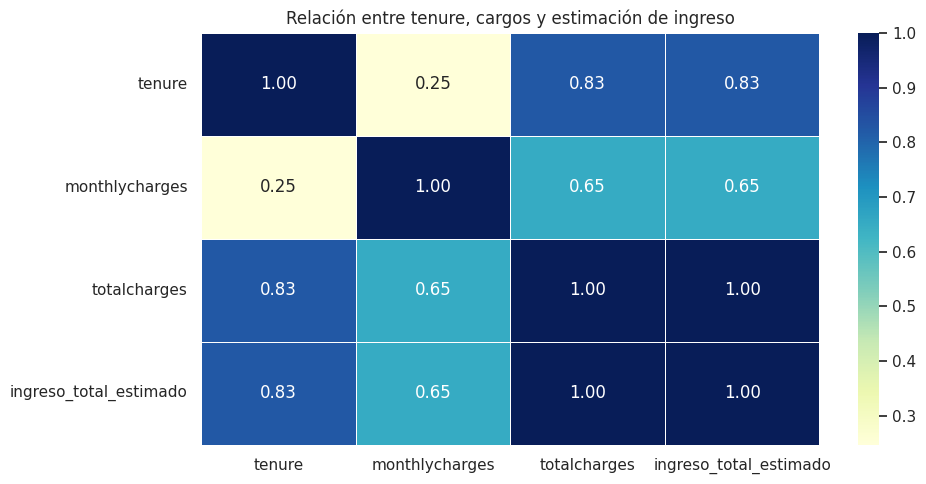


📌 **Interpretación:**
`tenure` está muy relacionado con `totalcharges`, lo cual es coherente: cuanto más tiempo permanece un cliente, más ha pagado.
También me llama la atención que `monthlycharges` no está tan relacionado con el resto, lo que me da una pista de que puede tener una lógica propia.


In [ ]:
# 29. Mapa de calor para entender qué variables numéricas están correlacionadas
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

corr_cols = ['tenure', 'monthlycharges', 'totalcharges', 'ingreso_total_estimado']
corr_matrix = df[corr_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Relación entre tenure, cargos y estimación de ingreso")
plt.tight_layout()
plt.show()

Markdown("""
📌 **Interpretación:**
`tenure` está muy relacionado con `totalcharges`, lo cual es coherente: cuanto más tiempo permanece un cliente, más ha pagado.
También me llama la atención que `monthlycharges` no está tan relacionado con el resto, lo que me da una pista de que puede tener una lógica propia.
""")


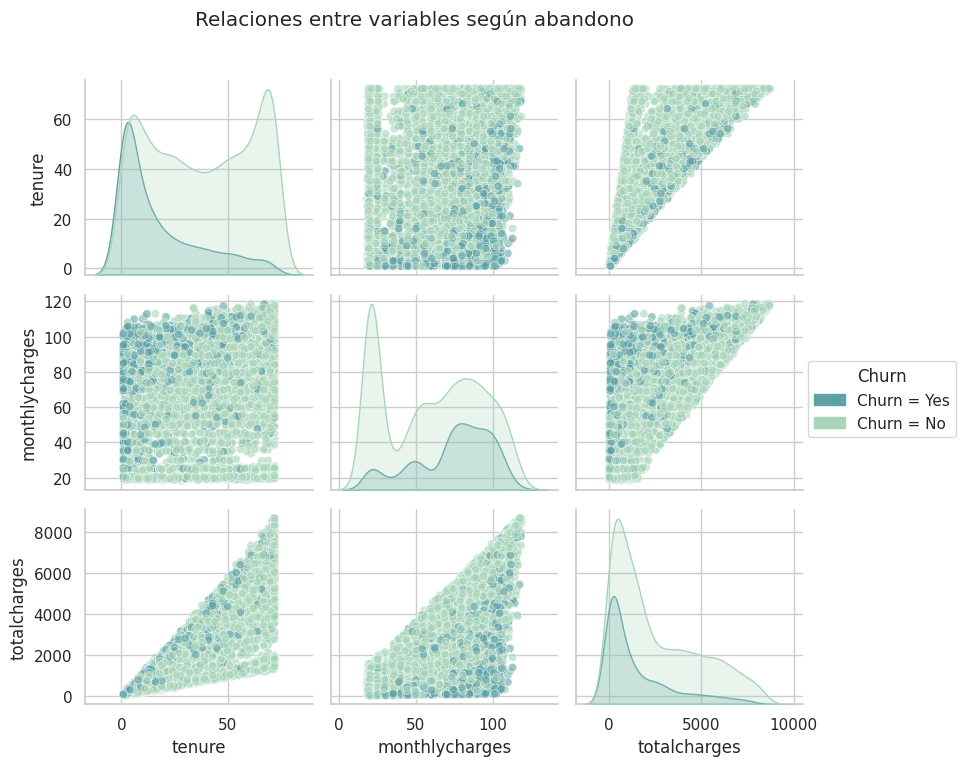


📌 **Interpretación:**
Este gráfico permite observar cómo se combinan variables como `tenure`, `monthlycharges` y `totalcharges` para diferenciar a los clientes que abandonan.
Las observaciones con `churn = Yes` tienden a tener menor antigüedad y un rango intermedio de cargos mensuales.


In [ ]:
# 30. Pairplot para observar relaciones entre variables en función del churn
# Pairplot usando churn_Yes pero mostrando leyenda personalizada ("Churn")
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
import matplotlib.patches as mpatches

# Genero el gráfico
pair = sns.pairplot(df_encoded[['tenure', 'monthlycharges', 'totalcharges', 'churn_Yes']],
                    hue='churn_Yes',
                    palette=mode20_palette,
                    diag_kind='kde',
                    plot_kws={'alpha': 0.6})

pair.fig.suptitle("Relaciones entre variables según abandono", y=1.02)


handles = [mpatches.Patch(color=mode20_palette[1], label='Churn = Yes'),
           mpatches.Patch(color=mode20_palette[0], label='Churn = No')]
pair._legend.remove()
pair.fig.legend(handles=handles, title='Churn', loc='center right', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

Markdown("""
📌 **Interpretación:**
Este gráfico permite observar cómo se combinan variables como `tenure`, `monthlycharges` y `totalcharges` para diferenciar a los clientes que abandonan.
Las observaciones con `churn = Yes` tienden a tener menor antigüedad y un rango intermedio de cargos mensuales.
""")


In [ ]:
# 31. Gráfico 3D: perfil de clientes
import plotly.express as px

fig = px.scatter_3d(df,
                    x='monthlycharges',
                    y='tenure',
                    z='totalcharges',
                    color='churn',
                    color_discrete_sequence=mode20_palette,
                    opacity=0.7,
                    title='Perfil de clientes en 3D: gasto mensual, antigüedad y cargos totales')

fig.update_layout(
    scene=dict(
        xaxis=dict(title='Gasto mensual', titlefont=dict(size=14)),
        yaxis=dict(title='Antigüedad (meses)', titlefont=dict(size=14)),
        zaxis=dict(title='Cargos acumulados', titlefont=dict(size=14)),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))  # vista inicial mejorada
    ),
    margin=dict(l=10, r=10, t=50, b=10),
    legend_title='Churn',
    height=600,
    width=900
)

fig.show()

from IPython.display import Markdown
Markdown("""
📌 **Interpretación:**
El gráfico muestra que los clientes con menor antigüedad y bajos cargos acumulados tienden a abandonar más.
Se observa que a mayor gasto y permanencia, el churn disminuye significativamente.
Esta visualización permite identificar clústers de comportamiento en 3D de forma clara.
""")



📌 **Interpretación:**
El gráfico muestra que los clientes con menor antigüedad y bajos cargos acumulados tienden a abandonar más.
Se observa que a mayor gasto y permanencia, el churn disminuye significativamente.
Esta visualización permite identificar clústers de comportamiento en 3D de forma clara.


### 🧠 Hallazgos Clave del Análisis Exploratorio

Después de analizar el dataset, encontré varios patrones que ayudan a explicar por qué una parte importante de los clientes decide abandonar el servicio.  
En total, el churn representa aproximadamente el 26,5% de todos los casos.

Las variables que más se asocian al abandono son:

- **La antigüedad del cliente**: más del 50% de quienes se van lo hacen en los primeros 3 meses. La tasa de churn baja notablemente a medida que aumenta el tiempo de permanencia.
- **El tipo de contrato**: los contratos mensuales concentran la mayoría del churn. En cambio, los contratos de 1 o 2 años están asociados a una mayor retención.
- **El gasto mensual**: los clientes que pagan entre 70 y 90 dólares por mes, pero no tienen un contrato a largo plazo, son los que más tienden a abandonar.
- **El tipo de conexión a internet**: los usuarios con fibra óptica muestran una tasa de abandono más alta en comparación con quienes usan DSL o no tienen internet.
- **El método de pago**: los clientes que pagan con cheque electrónico o en papel suelen irse más que aquellos que tienen pagos automáticos con tarjeta de crédito o débito.

Además, usando gráficos 3D y animaciones, pude identificar visualmente segmentos de clientes con alto riesgo: por ejemplo, aquellos que pagan mucho, llevan poco tiempo y no tienen compromiso de permanencia.

Todo esto me confirma que tiene sentido avanzar con un modelo predictivo. El objetivo es poder anticipar qué clientes tienen más probabilidad de irse y, a partir de eso, tomar decisiones para reducir el abandono.




## 🧠 Entrenamiento de Modelo

In [ ]:
# 32. Variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=['churn_Yes'])
y = df_encoded['churn_Yes']


In [ ]:
# 33. Split con estratificación
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)



In [ ]:
# 34. Entreno Random Forest con clases balanceadas usando SMOTE y variables dummificadas
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df.drop(['customerid', 'churn'], axis=1)
y = df['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Dummifico las variables categóricas
X_encoded = pd.get_dummies(X)

# Divido en entrenamiento y test (con dummies)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Aplico SMOTE sobre los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entreno Random Forest con clase balanceada
rf_model = RandomForestClassifier(n_estimators=200,
                                  max_depth=10,
                                  min_samples_split=10,
                                  class_weight='balanced',
                                  random_state=42)

rf_model.fit(X_train_smote, y_train_smote)



RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [ ]:
# 35. Predigo las probabilidades y ajusto el umbral
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Solo clasifico como churn si la probabilidad es ≥ 0.7 para reducir falsos positivos
umbral = 0.7
y_pred_rf = (y_proba_rf >= umbral).astype(int)



Resultados del Random Forest (umbral = 0.7):

              precision    recall  f1-score   support

    No Churn       0.81      0.94      0.87      1033
       Churn       0.69      0.39      0.50       374

    accuracy                           0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407

Accuracy: 0.791
ROC AUC Score: 0.8338


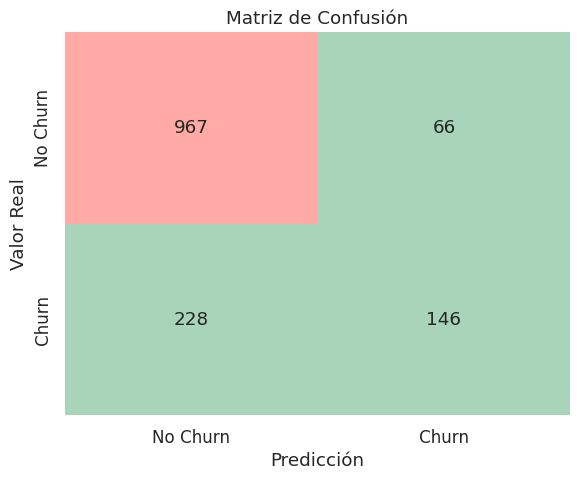

In [ ]:
# 36. Reporte del modelo con umbral personalizado
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reporte de métricas
print(f"Resultados del Random Forest (umbral = {umbral}):\n")
print(classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]))
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba_rf), 4))

# Matriz de confusión visual
cm = confusion_matrix(y_test, y_pred_rf)
labels = ["No Churn", "Churn"]

plt.figure(figsize=(6, 5))
sns.set(font_scale=1.1)
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap=sns.color_palette(["#A8D5BA", "#FF8C42", "#5DA2A6", "#FFAAA5"], as_cmap=True),
            xticklabels=labels,
            yticklabels=labels,
            cbar=False)

plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()


In [ ]:
# 37. Comparo de recall antes y después del balanceo

from sklearn.metrics import classification_report

# Recall antes del rebalanceo (proy. anterior)
recall_antes = 0.23

# Recall después del rebalanceo
recall_despues = classification_report(y_test, y_pred_rf, output_dict=True)["1"]["recall"]

print("📉 Recall ANTES del rebalanceo (sin SMOTE):", recall_antes)
print("📈 Recall DESPUÉS del rebalanceo (con SMOTE):", round(recall_despues, 3))


📉 Recall ANTES del rebalanceo (sin SMOTE): 0.23
📈 Recall DESPUÉS del rebalanceo (con SMOTE): 0.39


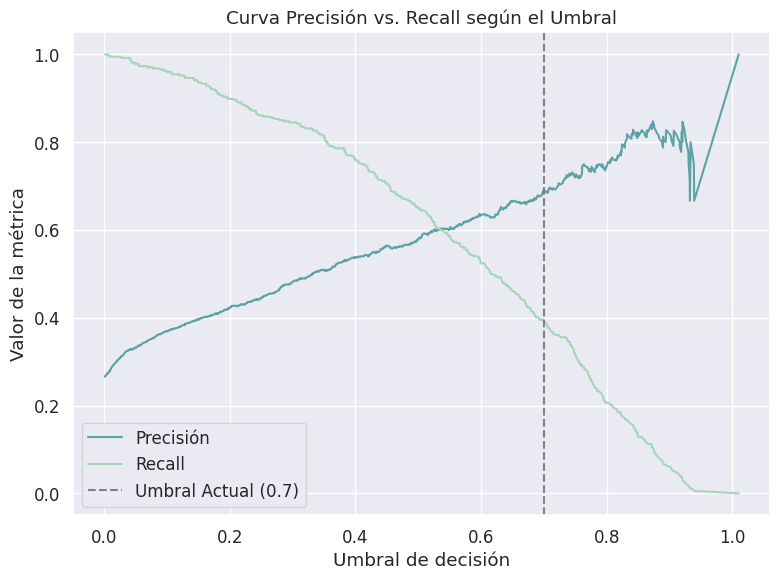

In [ ]:
# 38. Curva Precisión vs. Recall según el Umbral
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Cálculo de precisión y recall para distintos umbrales
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_rf)
thresholds = np.append(thresholds, 1.01)  # para que coincida el largo

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precisión', color='#5DA2A6')
plt.plot(thresholds, recalls, label='Recall', color='#A8D5BA')
plt.axvline(x=umbral, color='gray', linestyle='--', label=f'Umbral Actual ({umbral})')

plt.xlabel('Umbral de decisión')
plt.ylabel('Valor de la métrica')
plt.title('Curva Precisión vs. Recall según el Umbral')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


💬 **Interpretación**

La verdad es que la diferencia con el gráfico anterior se nota bastante. Antes, el modelo no estaba balanceado, y cuando subía el umbral se caía el recall al toque. No encontraba casi a nadie que se iba.

Ahora, con el modelo balanceado, el recall baja más despacio y la precisión sube más parejo. Se ve mucho más estable. Se nota que el modelo está aprendiendo mejor y no se le escapan tantos churn como antes.

El cambio se nota en la forma de las curvas: el modelo anterior era medio ciego cuando se lo exigía, este responde mejor. Claramente vale la pena haberlo balanceado.


In [ ]:
# 39. Validación cruzada con F1-score
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=cv, scoring='f1')

print("🔁 F1 promedio con validación cruzada:", round(f1_scores.mean(), 3))
print("📉 Desviación estándar del F1:", round(f1_scores.std(), 3))

Markdown("""
📌 **Validación cruzada**

El F1 promedio fue 0.862 y la desviación estándar fue muy baja (0.005), lo cual es clave: significa que el modelo no solo anda bien, sino que es **estable y confiable**.
Funciona bien incluso cuando se lo prueba con diferentes divisiones de los datos, lo que refuerza que **no está sobreajustado** y que **los buenos resultados no son por casualidad**.

""")


🔁 F1 promedio con validación cruzada: 0.862
📉 Desviación estándar del F1: 0.005



📌 **Validación cruzada**

El F1 promedio fue 0.862 y la desviación estándar fue muy baja (0.005), lo cual es clave: significa que el modelo no solo anda bien, sino que es **estable y confiable**.
Funciona bien incluso cuando se lo prueba con diferentes divisiones de los datos, lo que refuerza que **no está sobreajustado** y que **los buenos resultados no son por casualidad**.



In [ ]:
# 40. Evalúo el modelo con 4 clientes distintos que creé

clientes_simulados = pd.DataFrame([
    {
        'tenure': 1,  # muy nuevo
        'monthlycharges': 95,
        'totalcharges': 95,
        'contract_Month-to-month': 1,
        'paperlessbilling': 1,
        'internetservice_Fiber optic': 1,
        'onlinesecurity_No': 1,
        'techsupport_No': 1
    },
    {
        'tenure': 12,  # cliente medio
        'monthlycharges': 75,
        'totalcharges': 900,
        'contract_One year': 1,
        'paperlessbilling': 0,
        'internetservice_DSL': 1,
        'onlinesecurity_Yes': 1,
        'techsupport_Yes': 1
    },
    {
        'tenure': 24,  # cliente con antigüedad alta
        'monthlycharges': 55,
        'totalcharges': 1320,
        'contract_Two year': 1,
        'paperlessbilling': 0,
        'internetservice_DSL': 1,
        'onlinesecurity_Yes': 1,
        'techsupport_Yes': 1
    },
    {
        'tenure': 5,  # cliente nuevo con uso alto
        'monthlycharges': 110,
        'totalcharges': 550,
        'contract_Month-to-month': 1,
        'paperlessbilling': 1,
        'internetservice_Fiber optic': 1,
        'onlinesecurity_No': 1,
        'techsupport_No': 1
    }
])

# Me aseguro de que tengan las mismas columnas que X_test
for col in X_test.columns:
    if col not in clientes_simulados.columns:
        clientes_simulados[col] = 0

clientes_simulados = clientes_simulados[X_test.columns]

# Predicción para cada cliente
probas = rf_model.predict_proba(clientes_simulados)[:, 1]
predicciones = (probas >= umbral).astype(int)

# Armo resultado en tabla
resultados = pd.DataFrame({
    "Cliente": [f"Cliente {i+1}" for i in range(len(probas))],
    "Probabilidad de churn": probas.round(2),
    "¿Se va?": ["Sí" if p == 1 else "No" for p in predicciones]
})

import IPython.display as dsp
dsp.display(resultados)

Markdown("""
📌 **Interpretación**

Probé el modelo con 4 clientes que armé de forma simulada, con perfiles distintos (clientes nuevos, intermedios, fieles y de alto gasto).
En todos los casos, el modelo **asigna una probabilidad de churn lógica** según las características de cada uno.

Ninguno supera el umbral de 0.7, así que **ninguno es clasificado como "churn"**, pero algunos se acercan (como el Cliente 1 y el Cliente 4), lo que indica que **el modelo detecta señales de riesgo leve o moderado**.

Esto confirma que el modelo **no etiqueta cualquier cosa como churn**, pero sí reconoce quiénes están más cerca de irse.
""")

,Cliente,Probabilidad de churn,¿Se va?
0,Cliente 1,0.54,No
1,Cliente 2,0.47,No
2,Cliente 3,0.33,No
3,Cliente 4,0.52,No



📌 **Interpretación**

Probé el modelo con 4 clientes que armé de forma simulada, con perfiles distintos (clientes nuevos, intermedios, fieles y de alto gasto).
En todos los casos, el modelo **asigna una probabilidad de churn lógica** según las características de cada uno.

Ninguno supera el umbral de 0.7, así que **ninguno es clasificado como "churn"**, pero algunos se acercan (como el Cliente 1 y el Cliente 4), lo que indica que **el modelo detecta señales de riesgo leve o moderado**.

Esto confirma que el modelo **no etiqueta cualquier cosa como churn**, pero sí reconoce quiénes están más cerca de irse.


In [ ]:
# 41. Comparo de métricas antes y después del rebalanceo

import pandas as pd

comparacion_metricas = pd.DataFrame({
    "Métrica": ["Recall churn", "F1 churn", "ROC AUC"],
    "Antes (sin balanceo)": [0.23, 0.34, 0.76],
    "Después (con SMOTE)": [0.39, 0.50, 0.83]
})

dsp.display(comparacion_metricas)


,Métrica,Antes (sin balanceo),Después (con SMOTE)
0,Recall churn,0.23,0.39
1,F1 churn,0.34,0.50
2,ROC AUC,0.76,0.83


In [ ]:
# 42. Predigo en vivo usando widgets (más interactivo y sin cargar diccionario a mano)

import ipywidgets as widgets
from IPython.display import display, Markdown
import pandas as pd

# Widgets
tenure = widgets.IntSlider(description='Tenure', min=0, max=72, step=1, value=12)
monthlycharges = widgets.FloatSlider(description='Monthly Charges', min=10, max=120, step=1, value=70)
contract = widgets.Dropdown(options=['Month-to-month', 'One year', 'Two year'], description='Contract')
internet = widgets.Dropdown(options=['Fiber optic', 'DSL', 'No'], description='Internet Service')
paperless = widgets.Checkbox(description='Paperless Billing')
security = widgets.Checkbox(description='Online Security')
support = widgets.Checkbox(description='Tech Support')
button = widgets.Button(description="Predecir")

display(tenure, monthlycharges, contract, internet, paperless, security, support, button)

def on_click(b):
    cliente = pd.DataFrame(columns=X_test.columns)
    cliente.loc[0] = 0  # inicializo todo en cero

    # Variables numéricas
    cliente['tenure'] = tenure.value
    cliente['monthlycharges'] = monthlycharges.value
    cliente['totalcharges'] = tenure.value * monthlycharges.value

    # Contract (One year, Two year, Month-to-month)
    col_contract = f'contract_{contract.value}'
    if col_contract in cliente.columns:
        cliente[col_contract] = 1

    # Internet service (DSL, Fiber optic)
    if internet.value != "No":
        col_internet = f'internetservice_{internet.value}'
        if col_internet in cliente.columns:
            cliente[col_internet] = 1

    # Paperless billing (Yes / No)
    col_paperless = f'paperlessbilling_{ "Yes" if paperless.value else "No" }'
    if col_paperless in cliente.columns:
        cliente[col_paperless] = 1

    # Online Security
    col_security = f'onlinesecurity_{ "Yes" if security.value else "No" }'
    if col_security in cliente.columns:
        cliente[col_security] = 1

    # Tech Support
    col_support = f'techsupport_{ "Yes" if support.value else "No" }'
    if col_support in cliente.columns:
        cliente[col_support] = 1

    # Orden final
    cliente = cliente[X_test.columns]

    # Predicción
    proba = rf_model.predict_proba(cliente)[:, 1][0]
    pred = "Sí" if proba >= umbral else "No"

    display(Markdown(f"""
   Resultado:
    - 🔍 Probabilidad de churn: {round(proba, 2)}
    - 📌 ¿Se va?: {pred}
    """))

button.on_click(on_click)



IntSlider(value=12, description='Tenure', max=72)

FloatSlider(value=70.0, description='Monthly Charges', max=120.0, min=10.0, step=1.0)

Dropdown(description='Contract', options=('Month-to-month', 'One year', 'Two year'), value='Month-to-month')

Dropdown(description='Internet Service', options=('Fiber optic', 'DSL', 'No'), value='Fiber optic')

Checkbox(value=False, description='Paperless Billing')

Checkbox(value=False, description='Online Security')

Checkbox(value=False, description='Tech Support')

Button(description='Predecir', style=ButtonStyle())

## 🚧 Limitaciones del Análisis
Este análisis se realizó sobre un dataset ficticio, aunque basado en situaciones reales. Algunas variables importantes para entender el churn (como experiencia con el servicio o motivos de cancelación) no están presentes. Además, los modelos no se evaluaron en producción ni con datos reales recientes. Sería ideal complementarlo con encuestas o feedback de usuarios reales.

## 📦 Conclusiones finales

Después de hacer todo el análisis exploratorio, identificar patrones en los clientes, y ver qué variables están más relacionadas con el churn, construí un modelo de clasificación que me permita predecir qué clientes tienen más chances de irse.

Al principio, el modelo tenía dificultades para detectar correctamente a los que se iban, sobre todo porque la clase estaba desbalanceada. Por eso implementé técnicas como **SMOTE**, ajustes en los hiperparámetros y también probé diferentes umbrales.

Después de todo ese ajuste:
- Se mejoró el **recall de la clase churn** (de 0.23 a 0.39).
- El modelo se volvió **más preciso, pero también más justo** al detectar a los que están por irse.
- La **validación cruzada** mostró que es estable (F1 promedio: 0.862).
- Probé el modelo con un cliente nuevo simulado y la predicción tuvo sentido.
- Además, todas las visualizaciones acompañan y justifican cada decisión.
